# Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading datset

In [2]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Machine-Learning\Condition Monitoring of Hydraulic System\condition_monitoring_of_Hydraulic_system.csv")

In [3]:
df

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,...,P1,VS1,CE1,CP1,SE1,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,0,160.673492,109.466914,1.991475,0.000000,9.842170,9.728098,6.709815,10.304592,35.621983,...,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1
1,1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,6.715315,10.403098,36.676967,...,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1
2,2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,6.718522,10.366250,37.880800,...,2519.928000,0.576533,22.218233,1.113217,59.543150,3,100,0,130,1
3,3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337430,6.720565,10.302678,38.879050,...,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1
4,4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,6.690308,10.237750,39.803917,...,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,161.227572,109.779581,2.001438,10.202473,9.972037,9.850361,6.689930,10.184515,35.313783,...,2543.911033,0.550833,46.628517,2.160600,59.033100,100,100,0,90,0
2201,2201,161.206070,109.787481,1.998781,10.197919,9.966184,9.844854,6.692182,10.177767,35.321600,...,2543.411333,0.547483,46.689817,2.151450,59.068000,100,100,0,90,0
2202,2202,161.192120,109.756174,1.993436,10.196824,9.964329,9.842629,6.693277,10.176172,35.319183,...,2542.729767,0.545233,46.472300,2.143300,59.132350,100,100,0,90,0
2203,2203,161.208917,109.793884,2.007077,10.198588,9.968232,9.846690,6.684128,10.178353,35.324767,...,2544.046333,0.537017,46.544967,2.148483,58.970800,100,100,0,90,0


In [4]:
df.columns

Index(['Unnamed: 0', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2',
       'TS1', 'TS2', 'TS3', 'TS4', 'P1', 'VS1', 'CE1', 'CP1', 'SE1',
       'y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc',
       'y_stableFlag'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,...,P1,VS1,CE1,CP1,SE1,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,6.198549,9.649453,45.424567,...,2495.509203,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,636.672993,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,1.032883,0.449246,7.991933,...,73.836682,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,0.000000,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2.018572,8.857513,35.313783,...,2361.747267,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,551.000000,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,6.391670,9.203397,36.237150,...,2442.933467,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,1102.000000,158.960895,107.730169,1.779630,0.000000,9.115781,9.031516,6.576673,9.692270,44.836650,...,2480.926633,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,1653.000000,161.000735,109.421612,1.932047,3.503266,9.844351,9.729275,6.657508,10.155008,54.104317,...,2548.211467,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,2204.000000,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,6.722707,10.403098,57.899283,...,2740.641000,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


# Assigning values to X and y

In [6]:
X = df[['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'FS1', 'FS2',
       'TS1', 'TS2', 'TS3', 'TS4', 'P1', 'VS1', 'CE1', 'CP1', 'SE1']]
y = df[['y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc',
       'y_stableFlag']]

In [7]:
X

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1
0,160.673492,109.466914,1.991475,0.000000,9.842170,9.728098,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,10.202473,9.972037,9.850361,6.689930,10.184515,35.313783,40.874800,38.269267,30.404733,2543.911033,0.550833,46.628517,2.160600,59.033100
2201,161.206070,109.787481,1.998781,10.197919,9.966184,9.844854,6.692182,10.177767,35.321600,40.868883,38.268250,30.416233,2543.411333,0.547483,46.689817,2.151450,59.068000
2202,161.192120,109.756174,1.993436,10.196824,9.964329,9.842629,6.693277,10.176172,35.319183,40.875950,38.246367,30.426250,2542.729767,0.545233,46.472300,2.143300,59.132350
2203,161.208917,109.793884,2.007077,10.198588,9.968232,9.846690,6.684128,10.178353,35.324767,40.876067,38.245733,30.414283,2544.046333,0.537017,46.544967,2.148483,58.970800


In [8]:
y

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


# Split the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [10]:
X_train

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1
572,156.259090,105.109720,1.686528,0.000000,8.409337,8.359900,6.572717,8.932982,57.330050,61.493300,58.674333,52.562750,2367.347967,0.727367,18.882850,1.471883,59.950200
117,157.029422,106.361600,1.729071,0.000000,8.592279,8.533665,6.601323,9.239225,53.610750,58.093367,55.153417,49.000933,2405.333733,0.653417,20.267500,1.531833,60.262533
1161,159.114915,107.267202,1.803048,0.000000,9.136608,9.051796,6.632630,9.690735,44.593617,49.634633,46.804117,40.021017,2460.764700,0.612783,27.786933,1.770233,58.852000
789,158.176940,107.214707,1.786352,0.000000,8.970626,8.898110,6.634915,9.604517,47.109183,52.262500,49.325900,42.666800,2447.128100,0.597333,26.399917,1.724267,59.569083
1322,158.989445,107.983810,1.806356,0.000158,9.146062,9.061882,6.672445,9.723228,44.389533,49.417183,46.637700,39.878583,2464.307600,0.602217,27.348517,1.772367,59.857767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,158.867803,107.103200,1.789223,0.000000,9.054415,8.976108,6.643458,9.662503,45.757833,50.665533,47.919200,41.195717,2460.162400,0.616033,28.058167,1.751483,58.991450
1731,160.771032,109.054252,1.935512,10.112827,9.880726,9.761596,6.500505,10.175213,35.897400,41.499200,38.796267,30.888767,2553.740300,0.542833,47.345067,2.168317,56.692333
763,157.909970,106.973936,1.779225,0.000000,8.924975,8.852112,6.626108,9.544212,47.881850,53.009617,50.051850,43.319533,2436.215500,0.595333,26.283400,1.731600,59.623317
835,158.262197,107.266625,1.803427,0.000000,8.985091,8.909845,6.636710,9.607130,46.754067,51.858083,48.984550,42.363117,2443.892400,0.603817,26.282333,1.713750,59.742533


In [11]:
y_train

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
572,3,80,0,100,0
117,3,100,0,130,1
1161,20,73,0,115,0
789,20,100,0,90,1
1322,20,100,0,100,0
...,...,...,...,...,...
1033,20,73,0,130,0
1731,100,80,1,130,0
763,20,100,0,90,1
835,20,100,0,90,1


In [12]:
X_test

,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1
1747,160.647718,109.422139,1.957377,10.112432,9.879644,9.761711,6.533342,10.179777,35.973683,41.559483,38.836933,30.975850,2551.794767,0.550383,47.250267,2.156450,57.367050
200,156.928997,106.243144,1.725192,0.000000,8.535125,8.478645,6.603242,9.185677,54.242117,58.860383,55.801950,49.493383,2397.766300,0.657617,20.107950,1.563267,60.555183
333,156.821348,106.100606,1.768056,0.110256,8.509735,8.452485,6.616405,9.179223,54.491600,59.252683,56.180117,49.713783,2403.734333,0.675850,20.352883,1.599183,60.126250
2042,161.098415,109.227591,1.991564,10.070233,9.842049,9.726338,6.686235,10.142925,36.231633,41.849533,39.087083,31.142117,2539.914500,0.550150,47.313050,2.170017,58.795683
206,156.975997,106.274665,1.752760,0.000000,8.532493,8.477292,6.586313,9.194767,54.300150,58.905800,55.849017,49.567633,2399.273533,0.671317,20.062617,1.556367,60.231650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,172.765863,122.665902,1.068509,0.013947,8.431605,8.384973,3.267127,8.981293,56.517917,59.900417,58.260017,52.129050,2633.740767,0.729217,19.069567,1.484767,29.870200
1175,158.994632,107.480166,1.801477,0.000000,9.138057,9.056158,6.664957,9.699608,44.609317,49.681483,46.934667,40.080350,2468.346167,0.611567,27.829333,1.792283,59.395700
286,156.404905,105.853168,1.690030,0.000000,8.515130,8.455835,6.350280,9.188508,54.441917,58.980533,55.894583,49.684133,2404.362267,0.655183,20.106000,1.537683,57.651133
2010,160.601713,109.158294,1.929946,10.066790,9.839934,9.725174,6.515223,10.147873,36.262450,41.859250,39.128017,31.282217,2548.620533,0.548867,46.917233,2.147017,57.128517


In [13]:
y_test

,y_coolerCondition,y_valveCondition,y_pumpLeak,y_hydraulicAcc,y_stableFlag
1747,100,100,1,130,0
200,3,100,0,130,1
333,3,100,0,115,1
2042,100,80,0,100,0
206,3,100,0,130,1
...,...,...,...,...,...
488,3,80,2,100,0
1175,20,80,0,115,0
286,3,100,1,130,0
2010,100,90,1,100,0


# Initialize and fit SVM classifier

In [14]:
svm_classifier = SVC(kernel="rbf", C=1)

# Wrap the classifier in MultiOutputClassifier to handle multiple target variables
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Train the classifier
multi_output_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(C=1))

# Assigning values to y_pred

In [15]:
y_pred = multi_output_classifier.predict(X_test)

In [16]:
y_pred

array([[100, 100,   0,  90,   0],
       [ 20, 100,   0,  90,   0],
       [ 20, 100,   0,  90,   0],
       ...,
       [ 20, 100,   0,  90,   0],
       [100, 100,   0,  90,   0],
       [ 20, 100,   0,  90,   0]], dtype=int64)

# Evaluate each output variable separately

In [17]:
accuracies = []
for i in range(y_test.shape[1]):
    accuracy_i = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies.append(accuracy_i)
    print(f"Accuracy for {y_test.columns[i]}: {accuracy_i}")

# Calculate overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)
print(f"Overall Accuracy: {overall_accuracy}")

Accuracy for y_coolerCondition: 0.6439909297052154
Accuracy for y_valveCondition: 0.5124716553287982
Accuracy for y_pumpLeak: 0.5714285714285714
Accuracy for y_hydraulicAcc: 0.3469387755102041
Accuracy for y_stableFlag: 0.6780045351473923
Overall Accuracy: 0.5505668934240362


# Plot confusion matrix for each output variable

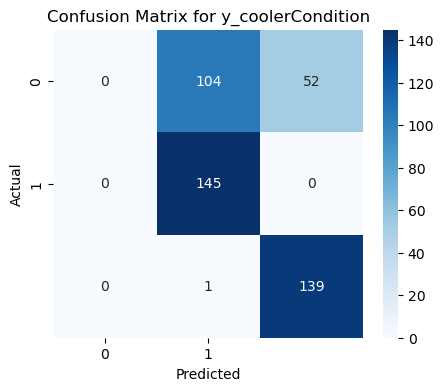

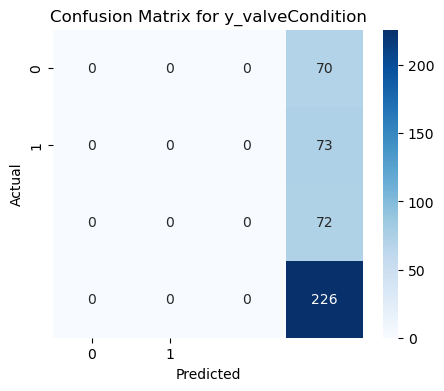

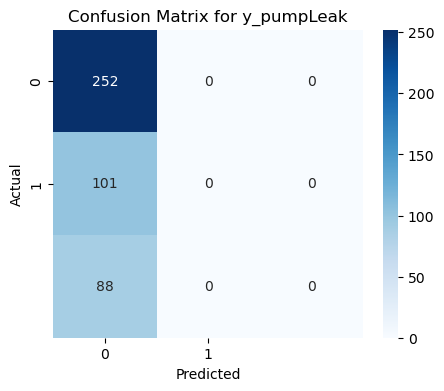

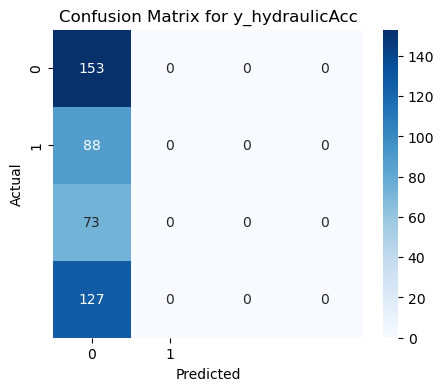

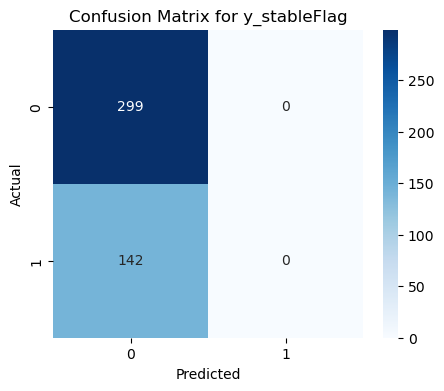

In [18]:
for i in range(y_test.shape[1]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {y_test.columns[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()